In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


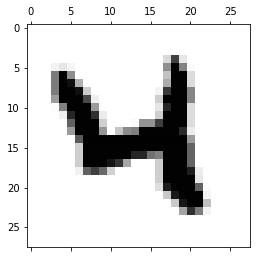

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [16]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

opt=["sgd","adam","adagrad"]

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
models=[]
for i in range(3):
    model=compile_model(opt[i])
    models.append(model)


# train DNN and store training info in history
history = []
for model in models:
    history.append(model.fit(X_train, Y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_test, Y_test)))

W0918 10:25:51.374759 4483229120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 10:25:51.379519 4483229120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 10:25:51.397612 4483229120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 10:25:51.476639 4483229120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0918 10:25:51.505567 4483229120 depre

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 256us/step - loss: 0.7581 - acc: 0.7768 - val_loss: 0.3120 - val_acc: 0.9174
Epoch 2/5
60000/60000 [==============================] - 15s 255us/step - loss: 0.3849 - acc: 0.8910 - val_loss: 0.2382 - val_acc: 0.9324
Epoch 3/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.3105 - acc: 0.9125 - val_loss: 0.2024 - val_acc: 0.9414
Epoch 4/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.2662 - acc: 0.9249 - val_loss: 0.1729 - val_acc: 0.9485
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.2339 - acc: 0.9345 - val_loss: 0.1539 - val_acc: 0.9548
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 574us/step - loss: 0.2860 - acc: 0.9166 - val_loss: 0.1192 - val_acc: 0.9624
Epoch 2/5
60000/60000 [==============================] - 31s 516us/step 

Model  sgd
10000/10000 [==============================] - 1s 62us/step
Test loss: 0.15394539065882565
Test accuracy: 0.9548

Model  adam
10000/10000 [==============================] - 1s 90us/step
Test loss: 0.07957733955216245
Test accuracy: 0.9774

Model  adagrad
10000/10000 [==============================] - 1s 64us/step
Test loss: 0.07067406501923688
Test accuracy: 0.9777



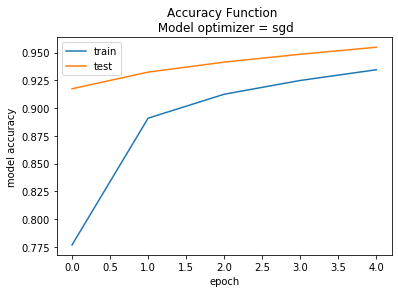

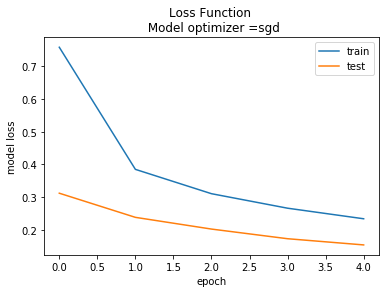

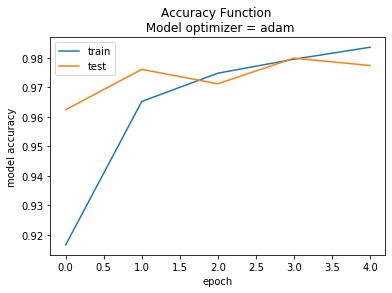

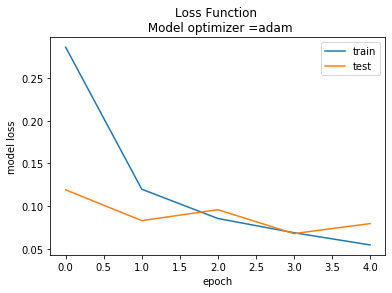

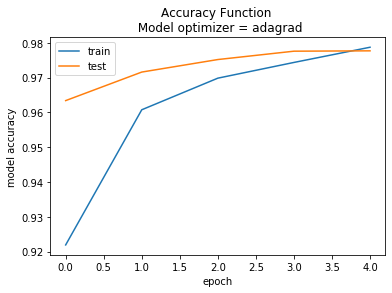

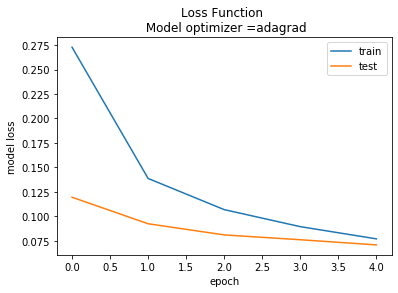

In [21]:
# evaluate model
i=0
for model in models:
    print("Model ",opt[i])
    score = model.evaluate(X_test, Y_test, verbose=1)
    # print performance
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()
    i+=1
    
# look into training history
i=0
for h in history:
    # summarize history for accuracy
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title("Accuracy Function \n Model optimizer = "+opt[i])
    plt.show()

    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title("Loss Function \n Model optimizer ="+opt[i])
    plt.show()
    i+=1

Model with optimizer =  sgd


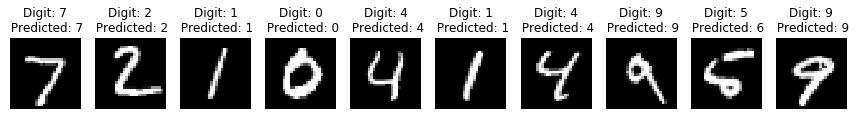

Model with optimizer =  adam


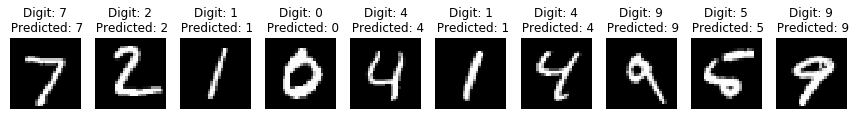

Model with optimizer =  adagrad


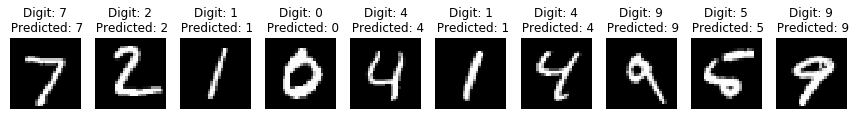

In [39]:
j=0
for model in models:
    print("Model with optimizer = ",opt[j])
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions=model.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    plt.figure(figsize=(15, 15)) 
    
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\n Predicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    j+=1

Andando ad osservare i valori di accuratezza e di perdita dei 3 modelli considerati, ci si rende conto che è molto più conveniente usare come ottimizzatori "*adam*" e "*adagrad*". Infatti si vede che il *test loss* migliora di un ordine di grandezza usando questi ultimi due e migliora anche l'accuratezza. 
Si nota anche che dai risultati della predizione si può vedere che 1 risultato su 10, quello relativo al numero 5, è stato predetto scorrettamento con l'optimizer "*sgd*".

Ci si rende conto dell'importanza di adeguare l'ottimizzatore al modello in questione nel caso appena osservato.